# Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

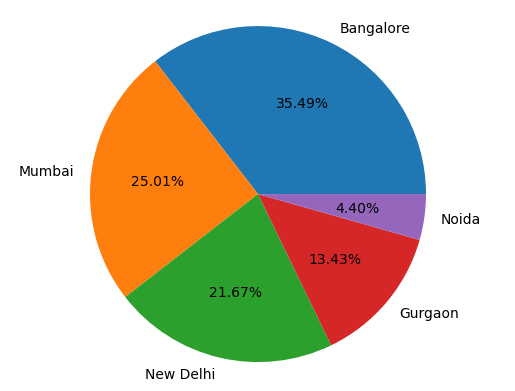

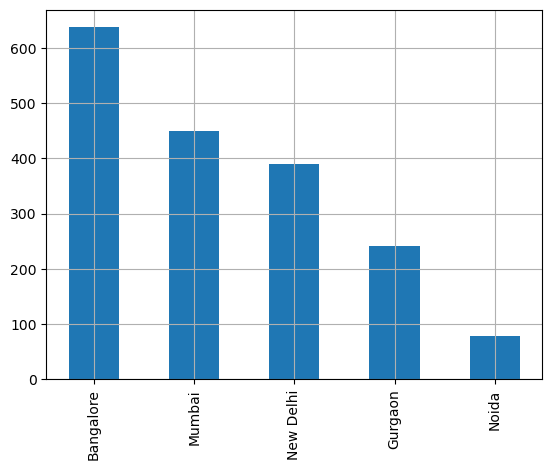

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.dropna(subset = ["CityLocation"],inplace = True)
df.loc[df["CityLocation"]=="bangalore","CityLocation"]="Bangalore"
df.loc[df["CityLocation"]=="Delhi","CityLocation"]="New Delhi"
# Now using dictionary trying to find the number of startups that has "CityLocation" as Bangalore,Mumbai and NCR.
dict ={}
for i in df["CityLocation"].values:
    if "Bangalore" in i:
        dict["Bangalore"]=dict.get("Bangalore",0)+1
    elif "New Delhi" in i:
        dict["New Delhi"]=dict.get("New Delhi",0)+1
    elif "Mumbai" in i:
        dict["Mumbai"] =dict.get("Mumbai",0)+1
    elif "Noida" in i:
        dict["Noida"] =dict.get("Noida",0)+1
    elif "Gurgaon" in i:
        dict["Gurgaon"] =dict.get("Gurgaon",0)+1
# Now creating list with the name of city and count and assigning the values of keys and values from dictionary "dict"
city =[]
count =[]
for keys,value in  dict.items():
    city.append(keys)
    count.append(value)
np_city = np.array(city)
np_count = np.array(count,dtype="int64")
np_city = np_city[np.argsort(np_count)][::-1]
np_count = np.sort(np_count)[::-1]
# In the above syntax,we have sorted both np_city and np_count.Now plotting them in pie chart to get an idea of percentage share
city =[]
count =[]
for keys,value in  dict.items():
    city.append(keys)
    count.append(value)
np_city = np.array(city)
np_count = np.array(count,dtype="int64")
np_city = np_city[np.argsort(np_count)][::-1]
np_count = np.sort(np_count)[::-1]
plt.pie(np_count,labels = np_city,autopct ="%.2f%%")
plt.axis("equal")
plt.show()
plt.bar(np_city,np_count,width = 0.5)
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Question 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 51
Kalaari Capital 44
SAIF Partners 40
Indian Angel Network 40


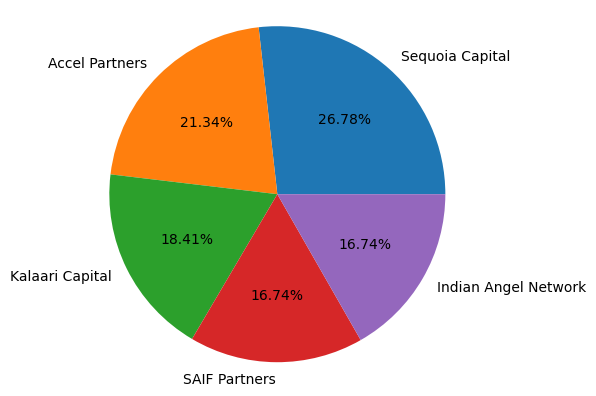

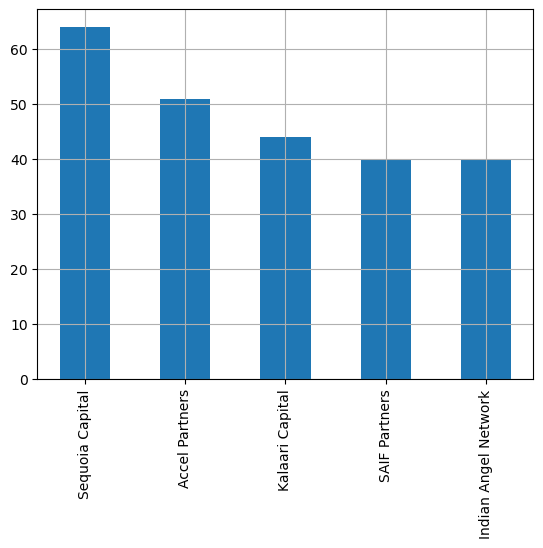

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.dropna(subset=["InvestorsName"],inplace = True)
np_investors = np.array(df["InvestorsName"],dtype='str')
investors =[]
for row in np_investors:
    if "undisclosed" not in row and "Undisclosed" not in row:
        val = row.split(",")
        for name in val:
            investors.append(name.strip())
dict={}
for i in investors:
    if i  in dict:
        dict[i]+=1
    else:
        dict[i]=1
x=[]
y=[]
for key,values in dict.items():
    x.append(key)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][:-6:-1]
np_y = np.sort(np_y)[:-6:-1]
for i in range(len(np_x)):
    print(np_x[i],int(np_y[i]))
plt.pie(np_y,labels = np_x,autopct ="%.2f%%")
plt.axis("equal")
plt.show()
plt.bar(np_x,np_y,width = 0.5)
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

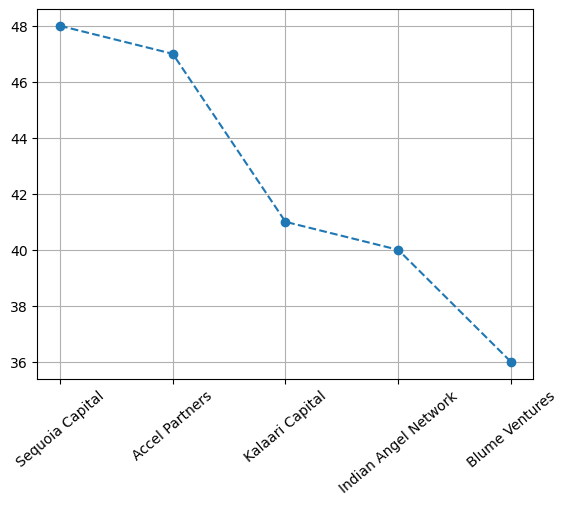

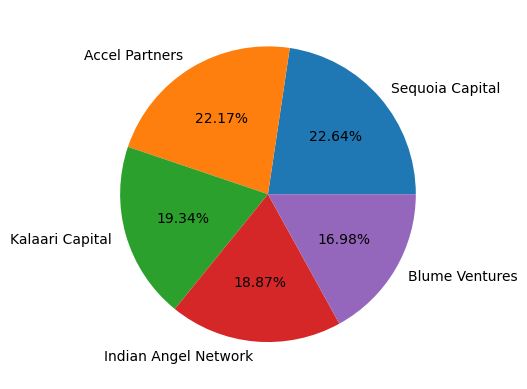

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.dropna(subset=["InvestorsName"],inplace = True)
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace = True)

# drop null values from StartupName column 
df.drop(df.index[df.StartupName.isnull()], inplace = True)
# correct spelling mistakes- Ola, Flipkart, Oyo and Paytm using replace fun
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True) 
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
np_investor = np.array(df.InvestorsName, dtype = 'str')

# create np array by StartupName column and dtype is string
np_startup = np.array(df.StartupName, dtype = 'str')

# stored investors who have invested maximum number of times in different companies in Dict.keys and 
# stored values of invested maximum number of times in different companies in Dict.values
Dict = {}
for i in range(len(np_investor)):
    investor = np_investor[i].strip()
    if "," in investor:
        val = investor.strip().split(',')
        for name in val:
            if name.strip() in Dict:
                Dict[name.strip()].add(np_startup[i].strip())
            else:
                s = set()
                Dict[name.strip()] = s
                Dict[name.strip()].add(np_startup[i].strip())
    else:
        name = investor.strip()
        if name in Dict:
            Dict[name].add(np_startup[i].strip())
        else:
            s = set()
            Dict[name] = s
            Dict[name].add(np_startup[i].strip())
            
            
investor = {}
for key in Dict:
    if key == "":
        continue
    investor[key] = len(Dict[key])
x = list(investor.keys())
y = list(investor.values())

np_x = np.array(x)
np_y = np.array(y)

np_x = np_x[np.argsort(np_y)]
np_y  = np.sort(np_y)

# extact top 5 investors who have invested maximum number of times in different companies startup
np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]

# plot line graph between top 5 investors and 
# thair invested maximum number of times in different companies startup
plt.plot(np_x, np_y, "o--")
plt.grid()
plt.xticks(rotation = 40)
plt.show()

# plot a pie graph 
plt.pie(np_y, labels = np_x, autopct = "%.2f%%")
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

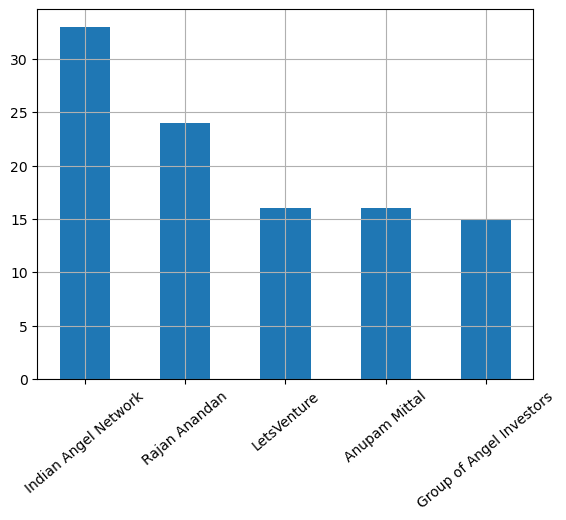

Indian Angel Network 33
Rajan Anandan 24
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 15


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.drop(df.index[df.InvestmentType.isnull()], inplace = True )
# reset index
df.reset_index(inplace = True, drop = True)

# handle spelling mistakes in InvestmentType col
df.loc[df.InvestmentType == 'PrivateEquity', 'InvestmentType'] = "Private Equity"
df.loc[df.InvestmentType == 'SeedFunding', 'InvestmentType'] = "Seed Funding"
df.loc[df.InvestmentType == 'Crowd funding', 'InvestmentType'] = "Crowd Funding"

# create np array by InvestorsName column and dtype is string
np_investor = np.array(df.InvestorsName, dtype = 'str') 

# all investors who have invested in a different number of startups and
# their investment type is Crowdfunding or Seed Funding.
investors = []
for i in range(len(np_investor)):
    if df['InvestmentType'][i] == "Seed Funding" or df['InvestmentType'][i] == "Crowd Funding":
        if 'Undisclosed' not in np_investor[i] or 'undisclosed' in np_investor[i]:
            if "," in np_investor[i]:
                val = np_investor[i].split(',')
                for name in val:
                    investors.append(name.strip())
            else:
                investors.append(np_investor[i].strip())
                
                
# stored investors in Dict.keys and 
# stored values maximum number of times invested In a startup and 
#  their investment type is Crowdfunding or Seed Funding for each investor in Dict.values
Dict = {}
for key in investors:
    if key in Dict:
        Dict[key] += 1
    else:
        Dict[key] = 1

del Dict[""]

x = list(Dict.keys())
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

# sort the np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]

# plot bar graph between investors and maximum number of times invested In a startup and 
# their investment type is Crowdfunding or Seed Funding for each investor 
plt.bar(np_x, np_y,width = 0.5)
plt.grid()
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# Question 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 59
Accel Partners 45
Kalaari Capital 38
SAIF Partners 34
Blume Ventures 29


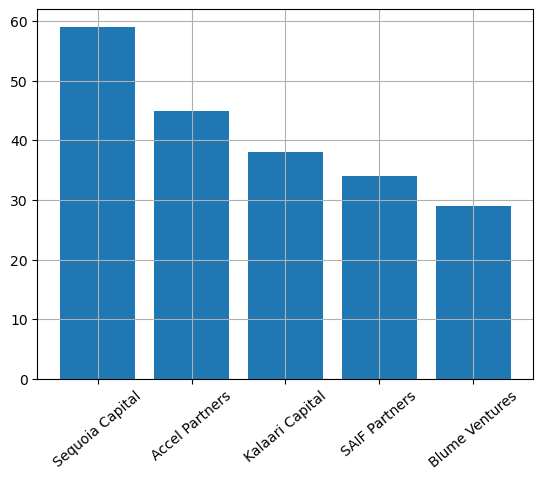

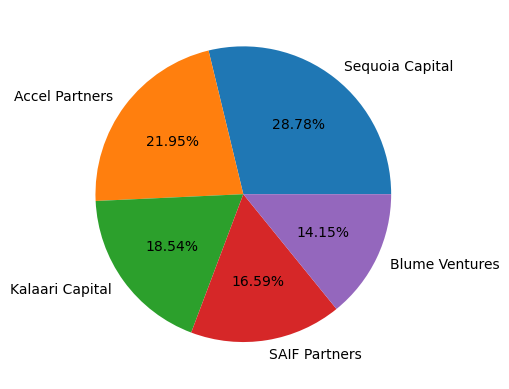

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.dropna(subset = ["InvestmentType"],inplace = True)
df.reset_index(inplace =True,drop = True)
df.loc[df["InvestmentType"]=="PrivateEquity","InvestmentType"]="Private Equity"
df.loc[df["InvestmentType"]=="SeedFunding","InvestmentType"]="Seed Funding"
df.loc[df["InvestmentType"]=="Crowd funding","InvestmentType"]="Crowd Funding"
np_investor = np.array(df.InvestorsName, dtype = 'str') 

# all investors who have invested in a different number of startups and
# their investment type is Crowdfunding or Seed Funding.
investors = []
for i in range(len(np_investor)):
    if df['InvestmentType'][i] == "Private Equity":
        if 'Undisclosed' not in np_investor[i] or 'undisclosed' in np_investor[i]:
            if "," in np_investor[i]:
                val = np_investor[i].split(',')
                for name in val:
                    investors.append(name.strip())
            else:
                investors.append(np_investor[i].strip())
Dict ={}
for key in investors:
    if key in Dict:
        Dict[key]+=1
    else:
        Dict[key] = 1
del Dict[""]
x =[]
y=[]
for keys,values in Dict.items():
    x.append(keys)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y,dtype="int64")
np_x = np_x[np.argsort(np_y)][:-6:-1]
np_y = np.sort(np_y)[:-6:-1]
for i in range(len(np_x)):
    print(np_x[i],np_y[i])
plt.bar(np_x, np_y)
plt.grid()
plt.xticks(rotation = 40)
plt.show()

# create a pie graph
plt.pie(np_y, labels = np_x, autopct = "%.2f%%")
plt.show()
       